# Spam Ham Detection using Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [2]:
data = pd.read_csv('spam_ham_dataset.csv')
data.head(), data.columns

(   email_id label                                               text  \
 0       605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
 1      2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
 2      3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
 3      4685  spam  Subject: photoshop , windows , office . cheap ...   
 4      2030   ham  Subject: re : indian springs\r\nthis deal is t...   
 
    label_num  
 0          0  
 1          0  
 2          0  
 3          1  
 4          0  ,
 Index(['email_id', 'label', 'text', 'label_num'], dtype='object'))

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   email_id   5171 non-null   int64 
 1   label      5171 non-null   object
 2   text       5171 non-null   object
 3   label_num  5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [4]:
data['text']

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object

In [5]:
data['text'] = data['text'].map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text)).apply(lambda x: (x.lower()).split())
for i in range(len(data)):
    data['text'][i] = data['text'][i][1:]

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_5344\1519568145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'][i] = data['text'][i][1:]


In [6]:
data['text']

0       [enron, methanol, meter, 988291, this, is, a, ...
1       [hpl, nom, for, january, 9, 2001, see, attache...
2       [neon, retreat, ho, ho, ho, we, re, around, to...
3       [photoshop, windows, office, cheap, main, tren...
4       [re, indian, springs, this, deal, is, to, book...
                              ...                        
5166    [put, the, 10, on, the, ft, the, transport, vo...
5167    [3, 4, 2000, and, following, noms, hpl, can, t...
5168    [calpine, daily, gas, nomination, julie, as, i...
5169    [industrial, worksheets, for, august, 2000, ac...
5170    [important, online, banking, alert, dear, valu...
Name: text, Length: 5171, dtype: object

In [7]:
ps = PorterStemmer()
corpus=data['text'].apply(lambda text_list:' '.join(list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),text_list)))))))

In [8]:
corpus

0       enron methanol meter 988291 follow note gave m...
1       hpl nom januari 9 2001 see attach file hplnol ...
2       neon retreat ho ho ho around wonder time year ...
3       photoshop window offic cheap main trend abas d...
4       indian spring deal book teco pvr revenu unders...
                              ...                        
5166    put 10 ft transport volum decreas 25000 10000 ...
5167    3 4 2000 follow nom hpl take extra 15 mmcf wee...
5168    calpin daili ga nomin juli mention earlier hop...
5169    industri worksheet august 2000 activ attach wo...
5170    import onlin bank alert dear valu citizensr ba...
Name: text, Length: 5171, dtype: object

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(corpus.values).toarray()
y = data.iloc[:,1].values

In [10]:
x,y

(array([[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object))

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7)
x_train.shape, x_test.shape

((3619, 42595), (1552, 42595))

In [12]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
decision = NB.fit(x_train, y_train)

In [13]:
result = decision.predict(x_test)
result

array(['spam', 'ham', 'ham', ..., 'spam', 'ham', 'spam'], dtype='<U4')

In [16]:
# Convert the set 'classes' to a list
classes = list(set(y_test))
num_classes = len(classes)

# Create the initial DataFrame with zeros
con_mat = pd.DataFrame(np.zeros((num_classes, num_classes), dtype=int), index=classes, columns=classes)

# Update the confusion matrix with the true labels and predictions
for true_label, prediction in zip(y_test, result):
    con_mat.loc[true_label, prediction] += 1

# Display the confusion matrix
print(con_mat)

       ham  spam
ham   1095    22
spam    17   418


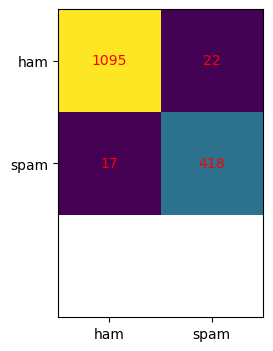

In [17]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(con_mat)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels = classes)
ax.yaxis.set(ticks=(0, 1), ticklabels = classes)
ax.set_ylim(2.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, con_mat.iloc[i, j], ha='center', va='center', color='red')
plt.show()

In [18]:
score = decision.score(x_test, y_test)
score*100

97.48711340206185

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, result))

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98      1117
        spam       0.95      0.96      0.96       435

    accuracy                           0.97      1552
   macro avg       0.97      0.97      0.97      1552
weighted avg       0.97      0.97      0.97      1552

